# Stock Market Clustering (Group 1)

## Main Part

Firstly, we will import the Python libraries required for the final project.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

The function **stockReturns** calculates the daily returns for all stocks in the dataframe.
* Input: A dataframe which contains all the closing stock prices throughout the year
* Output: A dataframe which contains the daily returns for all stocks

In [2]:
def stockReturns(priceDF):
    
    # Method 1: Compute daily returns by parsing the Data Frame as numpy matrix (Fastest)
    compTickers = priceDF.columns[1: ]    
    priceMat = priceDF.loc[ : , compTickers].as_matrix()    
    diffMat = (priceMat[1: ] - priceMat[ :-1]) / priceMat[ :-1]
    
    return pd.DataFrame(data = diffMat, index = priceDF.index[1: ], columns = compTickers)
    
    # Method 2: Compute daily returns by perfoming assignment directly on pandas Data Frame (Slowest)
#    dailyDF = pd.DataFrame(index = priceDF.index, columns = priceDF.columns)
#    dailyDF.Date = priceDF.Date
#    
#    for company in compNames:
#        for i in range(1, len(priceDF)):
#            prevPrice = priceDF.loc[i - 1, company]
#            currPrice = priceDF.loc[i, company]
#            dailyDF.loc[i, company] = (currPrice - prevPrice) / prevPrice
#    
#    return dailyDF[1: ]
    
    # Method 3: Compute daily returns by perfoming assignment directly on 2D array (Slower)
#    nrow = priceDF.shape[0] - 1
#    ncol = priceDF.shape[1] - 1
#    dailyReturn = [[0 for x in range(ncol)] for y in range(nrow)]
#    
#    for i in range(0, nrow):
#        
#        j = 0
#        for company in compNames:
#            prevPrice = priceDF.loc[i, company]
#            currPrice = priceDF.loc[i + 1, company]
#            dailyReturn[i][j] = (currPrice - prevPrice) / prevPrice
#            j += 1
#            
#    return dailyReturn

The function **calCorrelations** calculates the pairwise correlations between all the stocks.
* Input: A dataframe which contains the daily returns for all stocks
* Output: A dataframe and a graph which contains correlation coefficients of all stocks

In [3]:
def calCorrelations(dailyReturn):
    
    # Method 1: Pandas built-in function to calculate pairwise correlation (Fastest)
#    return dailyReturn.corr()
    
    # Method 2: Manual calculation of pairwise correlation using numpy matrix (Faster)
    col = dailyReturn.columns
    ncol = len(col)
    corrMat = np.identity(ncol)
    
    G = nx.Graph()
    G.add_nodes_from(col.values)
        
    n = len(dailyReturn)
    for i in range(0, ncol):
        for j in range(i + 1, ncol):
            x = dailyReturn[col[i]]
            y = dailyReturn[col[j]]
            xsum = sum(x)
            ysum = sum(y)
            corrMat[i][j] = (n * sum(x * y) - xsum * ysum) / (np.sqrt(n * sum(x**2) - xsum**2) * np.sqrt(n * sum(y**2) - ysum**2))
            corrMat[j][i] = corrMat[i][j]
            G.add_edge(col[i], col[j], weight = corrMat[i][j])
        
    return pd.DataFrame(data = corrMat, index = col, columns = col), G
    
    # Method 3: Manual calculation of pairwise correlation using numpy matrix (Faster)
#    col = dailyReturn.columns
#    ncol = len(col)
#    corrMat = np.zeros([ncol, ncol])
#        
#    n = len(dailyReturn)
#    for i in range(0, ncol):
#        for j in range(i, ncol):
#            x = dailyReturn[col[i]]
#            y = dailyReturn[col[j]]
#            xsum = sum(x)
#            ysum = sum(y)
#            corrMat[i][j] = (n * sum(x * y) - xsum * ysum) / (np.sqrt(n * sum(x**2) - xsum**2) * np.sqrt(n * sum(y**2) - ysum**2))
#        
#    return pd.DataFrame(data = corrMat, index = col, columns = col)
    
    # Method 4: Manual calculation of pairwise correlation using pandas Data Frame (Slower)
      
#    corrDF = pd.DataFrame(index = dailyReturn.columns, columns = dailyReturn.columns)
#    corrDF.fillna(0)
#
#    k = 0
#    n = len(dailyReturn)
#    for i in corrDF.index:
#        for j in corrDF.index[k: ]:
#            x = dailyReturn[i]
#            y = dailyReturn[j]
#            xsum = sum(x)
#            ysum = sum(y)
#            corr = (n * sum(x * y) - xsum * ysum) / (np.sqrt(n * sum(x**2) - xsum**2) * np.sqrt(n * sum(y**2) - ysum**2))
#            corrDF.loc[i, j] = corr
#        k += 1
#    
#    return corrDF

The function **stockClustering** clusters similar stocks based on the correlation coefficients.
* Input: A graph which contains correlation coefficients of all stocks (as edges' weights)
* Output: A list of sets, each set represents a distinct stock cluster

In [4]:
def stockClustering(graph, k):
            
    # Method 1: Clustering using dictionary and list
    sortedEdges = sorted(graph.edges(data = True), key = lambda edge: edge[2]['weight'], reverse = True)
    
    listSets = dict()    
    for node in graph.nodes():
        listSets[node] = {node}
        
    for i in range(0, k):
        (a, b, data) = sortedEdges[i]
        mergedSet = listSets[a].union(listSets[b])
        for node in mergedSet:
            listSets[node] = mergedSet
            
    resultSets = []
    for nodeSet in listSets.values():
        if nodeSet not in resultSets:
            resultSets.append(nodeSet)
        
    return resultSets
    
    # Method 2: Clustering using networkx graph
#    sortedEdges = sorted(graph.edges(data = True), key = lambda edge: edge[2]['weight'], reverse = True)
#    
#    G = nx.Graph()
#    G.add_nodes_from(graph.nodes())
#    
#    for i in range(0, k):
#        (a, b, data) = sortedEdges[i]
#        G.add_edge(a, b)
#        
#    return sorted(nx.connected_components(G))

The following codes read in the two CSV files and invoke the three functions.

In [5]:
priceDF = pd.read_csv('D:\Imperial MSc\Data Structures and Algorithms\Homework\Group Project\SP_500_close_2015.csv')
firmDF = pd.read_csv('D:\Imperial MSc\Data Structures and Algorithms\Homework\Group Project\SP_500_firms.csv')

dailyReturn = stockReturns(priceDF)
corr, corrGraph = calCorrelations(dailyReturn)
cluster = stockClustering(corrGraph, 800)

TEST CODE   
The following codes draw the graph with correlation coefficients as edge weights.

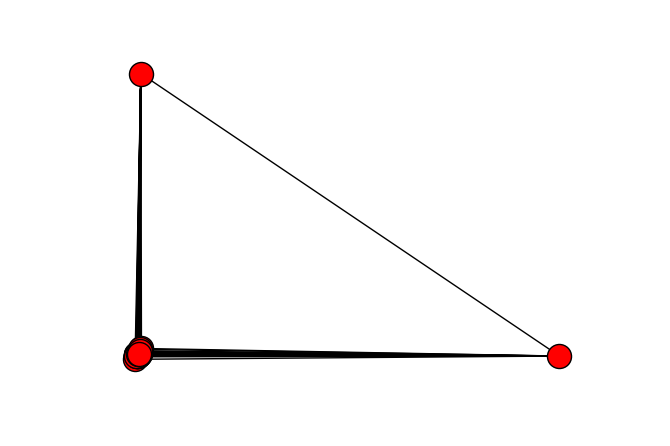

In [6]:
nx.draw_spectral(corrGraph)
plt.show()

## Extra

Other analyses here...